In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import os
os.listdir("../data")
df = pd.read_csv("../data/ikea_sales.csv")
df.head()

,Order_Date,Product,Category,Region,Sales,Quantity,Profit
0,2024-01-05,MALM Bed,Furniture,North,45000,3,8000
1,2024-01-12,BILLY Bookcase,Storage,South,30000,5,6000
2,2024-02-03,POÄNG Chair,Seating,East,20000,4,3500
3,2024-02-15,LINNMON Table,Tables,West,28000,6,5000
4,2024-03-02,MALM Bed,Furniture,South,48000,4,9000


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order_Date  12 non-null     object
 1   Product     12 non-null     object
 2   Category    12 non-null     object
 3   Region      12 non-null     object
 4   Sales       12 non-null     int64 
 5   Quantity    12 non-null     int64 
 6   Profit      12 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes


,Sales,Quantity,Profit
count,12.000000,12.000000,12.000000
mean,33500.000000,5.416667,6208.333333
std,9876.510241,1.443376,1900.458477
min,20000.000000,3.000000,3500.000000
25%,27250.000000,4.750000,4875.000000
50%,31000.000000,5.000000,6000.000000
75%,39000.000000,6.250000,7250.000000
max,50000.000000,8.000000,9500.000000


In [26]:
# Data cleaning and feature engineering

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.to_period('M')

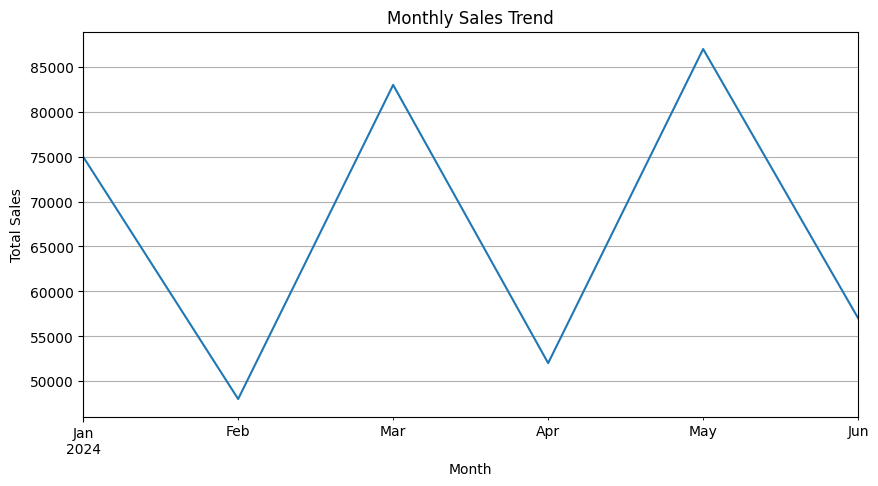

In [28]:
# Monthly Sales Trend

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


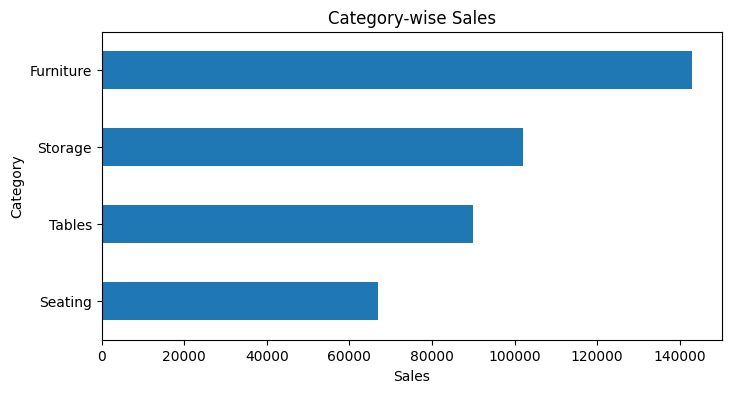

In [29]:
# category-wise Sales

category_sales = df.groupby('Category')['Sales'].sum().sort_values()

plt.figure(figsize=(8,4))
category_sales.plot(kind='barh')
plt.title("Category-wise Sales")
plt.xlabel("Sales")
plt.show()


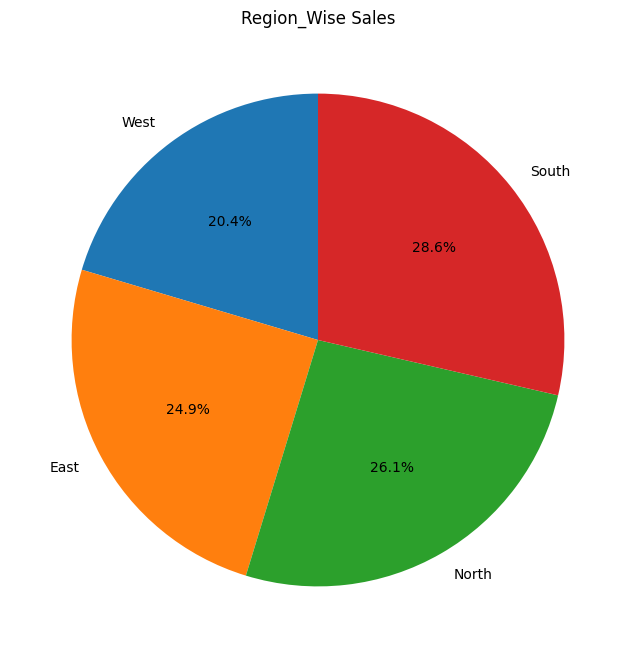

In [30]:
# Region-wise Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Region_Wise Sales")
plt.ylabel("")
plt.show()


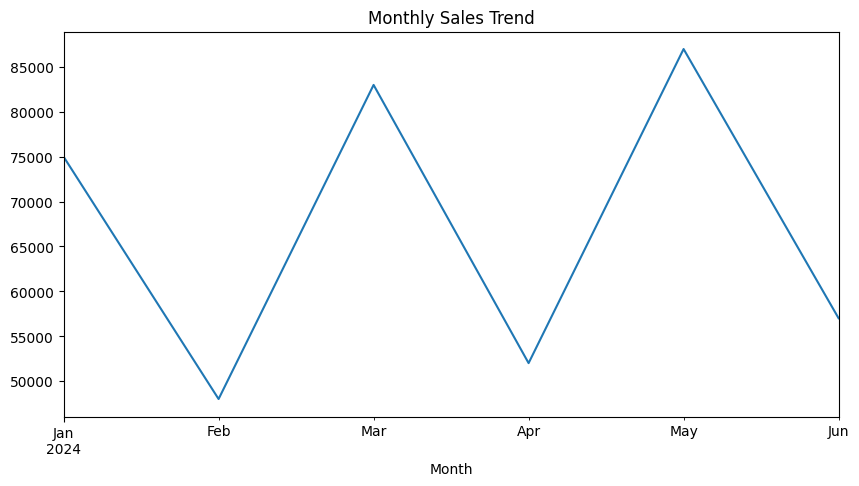

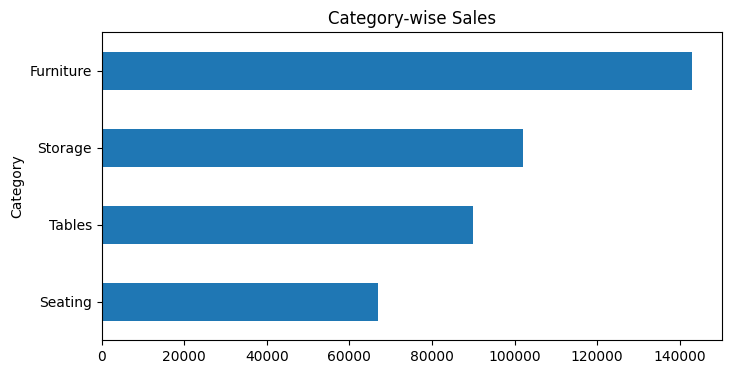

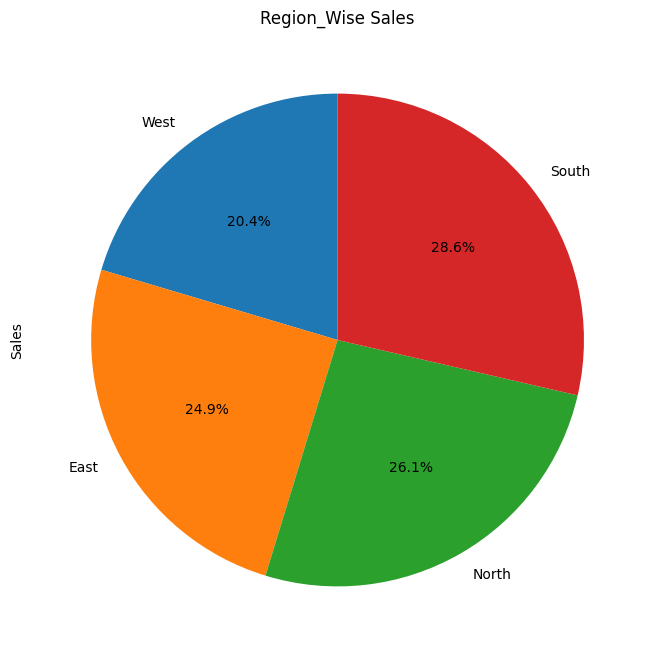

In [35]:
# Visual Save
plt.figure(figsize=(10,5))
monthly_sales.plot()

plt.title("Monthly Sales Trend")
plt.savefig("../visuals/monthly_sales_trend.png")
plt.show()

plt.figure(figsize=(8,4))
category_sales.plot(kind='barh')
plt.title("Category-wise Sales")
plt.savefig("../visuals/Category-wise Sales.png")
plt.show()

plt.figure(figsize=(8,8))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Region_Wise Sales")
plt.savefig("../visuals/Region_Wise Sales.png")
plt.show()


<Figure size 2000x2000 with 0 Axes>

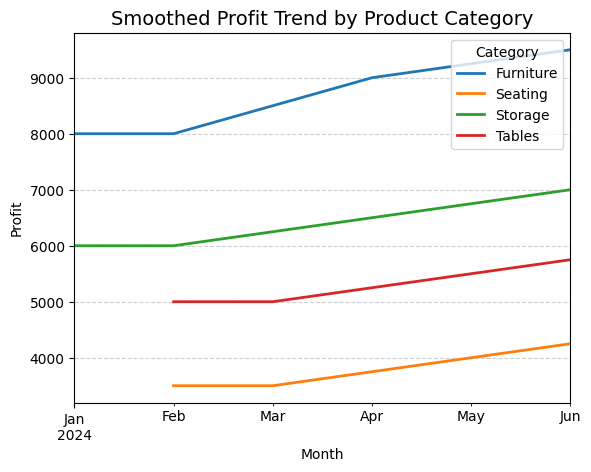

In [50]:
# Profit Analysis
total_profit = df['Profit'].sum()
total_profit

profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category

profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
profit_by_region


profit_pivot = df.pivot_table(
    index='Month',
    columns='Category',
    values='Profit',
    aggfunc='sum'
)
smoothed_profit = profit_pivot.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(20, 20))
smoothed_profit.plot(linewidth=2)

plt.title("Smoothed Profit Trend by Product Category", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Category")
plt.show()








In [ ]:
numeric_df = df[['Sales', 'Quantity', 'Profit']]
numeric_df


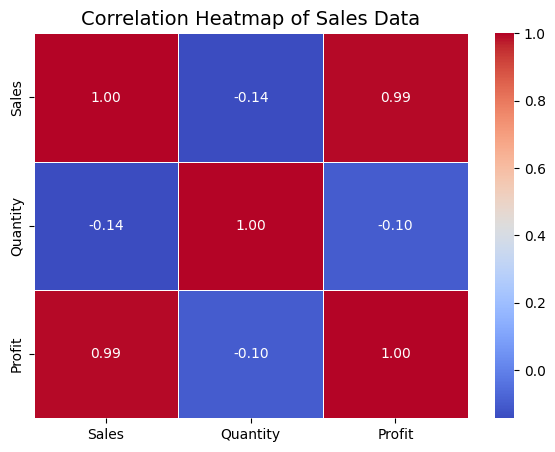

In [56]:
# Heat map
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Sales Data", fontsize=14)
plt.savefig("../visuals/Correlation Heatmap of Sales Data.png")
plt.show()


# Conclusion & Key Insights

**This project analyzed IKEA sales data to understand sales performance, profitability, and relationships between key business metrics.**

Key Findings:

1. Sales and Profit show a strong positive correlation, indicating higher revenue directly contributes to higher profitability.

2. Quantity sold has weak correlation with profit, suggesting pricing and product value play a bigger role than volume.

3. Certain product categories contribute disproportionately more to total profit.

4. Sales trends indicate consistent performance with identifiable growth periods.

**Business Recommendations:**

1. Focus on high-margin products rather than high-quantity products.

2. Optimize pricing strategies to maximize profit rather than sales volume.

3. Regional and category-level performance insights can guide inventory planning and marketing strategies.

**Conclusion:**

The analysis provides actionable insights that can help IKEA improve profitability, optimize sales strategies, and make data-driven business decisions.

In [ ]:
# Future Scope

1.  Perform predictive sales forecasting using machine learning.
2.  Analyze customer-level purchasing behavior.
3.  Build an interactive dashboard using Power BI or Tableau.


In [ ]:
## Project Summary & Limitations

This project focused on exploratory data analysis using a publicly available IKEA sales dataset.
The analysis is limited by the absence of customer-level data, promotional details, and cost breakdowns at a granular level.

All insights are based on historical transactional data and should be interpreted as descriptive rather than predictive.

Despite these limitations, the project demonstrates a complete data analysis workflow and highlights how data-driven insights can support business decision-making.
